In [5]:
# getting summary stats, nulls, basic checks for the cleaned dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
# load dataset and test
df_raw = pd.read_csv("../data/SpotifyFeatures.csv")
df = pd.read_csv("../data/cleanDataset.csv")
print(df.shape)

(176514, 18)


In [8]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [9]:
# getting info, missing, uniques
display(df.info())
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing>0])
unique_counts = df.nunique().sort_values()
display(unique_counts.tail(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176514 entries, 0 to 176513
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176514 non-null  object 
 1   artist_name       176514 non-null  object 
 2   track_name        176514 non-null  object 
 3   track_id          176514 non-null  object 
 4   popularity        176514 non-null  int64  
 5   acousticness      176514 non-null  float64
 6   danceability      176514 non-null  float64
 7   duration_ms       176514 non-null  int64  
 8   energy            176514 non-null  float64
 9   instrumentalness  176514 non-null  float64
 10  key               176514 non-null  object 
 11  liveness          176514 non-null  float64
 12  loudness          176514 non-null  float64
 13  mode              176514 non-null  object 
 14  speechiness       176514 non-null  float64
 15  tempo             176514 non-null  float64
 16  time_signature    17

None

Series([], dtype: int64)

mode                     2
time_signature           5
key                     12
genre                   27
popularity             101
danceability          1295
speechiness           1641
valence               1692
liveness              1732
energy                2517
acousticness          4733
instrumentalness      5399
artist_name          14564
loudness             27919
duration_ms          70718
tempo                78413
track_name          148615
track_id            176249
dtype: int64

In [10]:
#descriptions
numeric = df.select_dtypes(include=[np.number])
desc = numeric.describe().T
desc['iqr'] = desc['75%'] - desc['25%']
desc[['count','mean','std','min','25%','50%','75%','max','iqr']]

,count,mean,std,min,25%,50%,75%,max,iqr
popularity,176514.0,36.257634,17.392089,0.00000,25.0000,37.000000,49.0000,100.000,24.0000
acousticness,176514.0,0.403876,0.366286,0.00000,0.0455,0.288000,0.7910,0.996,0.7455
danceability,176514.0,0.541111,0.190441,0.05690,0.4150,0.558000,0.6830,0.989,0.2680
duration_ms,176514.0,236154.005665,130574.867253,15387.00000,178280.0000,219475.000000,268573.0000,5552917.000,90293.0000
energy,176514.0,0.557203,0.275855,0.00002,0.3440,0.592000,0.7890,0.999,0.4450
instrumentalness,176514.0,0.172211,0.323038,0.00000,0.0000,0.000071,0.0914,0.999,0.0914
liveness,176514.0,0.224628,0.211150,0.00967,0.0975,0.130000,0.2770,1.000,0.1795
loudness,176514.0,-10.137290,6.398382,-52.45700,-12.8500,-8.189000,-5.6290,3.744,7.2210
speechiness,176514.0,0.127471,0.204460,0.02220,0.0368,0.049400,0.1020,0.967,0.0652
tempo,176514.0,117.214397,31.323689,30.37900,92.0070,115.009000,138.8250,242.903,46.8180


In [11]:
# save the descriptions for later - if needed
desc.to_csv("../data/summary_stats_numeric.csv")

In [12]:
# categorical checks
cats = ["genre","key","mode","time_signature"]
for c in cats:
    if c in df.columns:
        print(f"--- {c} ---")
        print(df[c].value_counts().head(20))
        print()

--- genre ---
Comedy              9674
Electronic          9150
Alternative         9098
Anime               8935
Classical           8703
Reggae              8687
Reggaeton           8548
Soundtrack          8480
Blues               8474
Opera               8280
Folk                8050
Ska                 8010
Dance               7993
World               7961
Jazz                7957
Movie               7801
Hip-Hop             7414
Country             7382
Children's Music    5400
R&B                 5316
Name: genre, dtype: int64

--- key ---
C     20931
G     20446
D     18626
A     17482
C#    16829
F     15586
E     13393
B     12873
A#    11905
F#    11346
G#    11153
D#     5944
Name: key, dtype: int64

--- mode ---
Major    116441
Minor     60073
Name: mode, dtype: int64

--- time_signature ---
4/4    148968
3/4     20774
5/4      4425
1/4      2341
0/4         6
Name: time_signature, dtype: int64



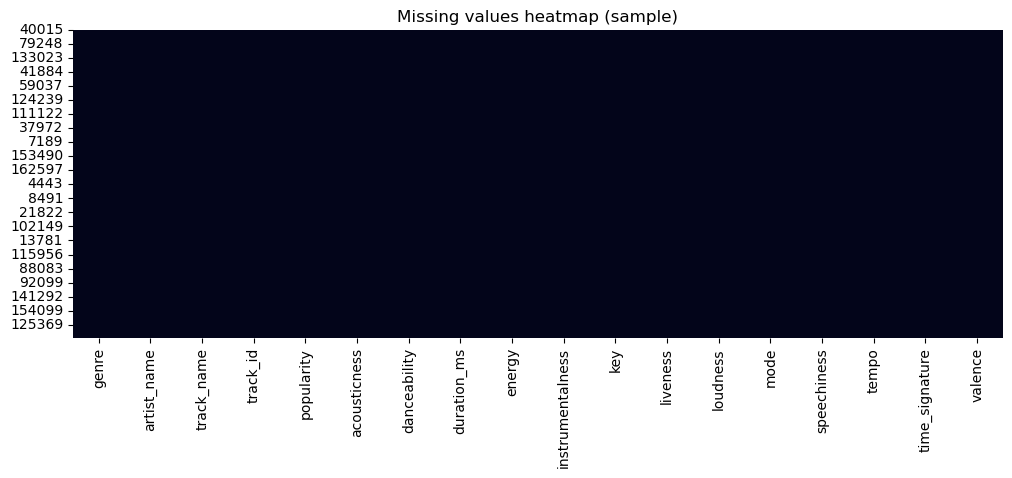

In [13]:
# missing heatmap (small sample to speed)
sample = df.sample(n=20000, random_state=1) if len(df)>20000 else df
plt.figure(figsize=(12,4))
sns.heatmap(sample.isnull(), cbar=False)
plt.title("Missing values heatmap (sample)")
plt.show()

In [14]:
# sanity ranges for key audio features
key_features = ["valence","danceability","energy","acousticness","instrumentalness","speechiness","loudness","tempo","duration_ms"]
for f in key_features:
    if f in df.columns:
        mn, q1, med, q3, mx = df[f].min(), df[f].quantile(0.25), df[f].median(), df[f].quantile(0.75), df[f].max()
        print(f"{f:15s} min={mn:.4g}  25%={q1:.4g}  med={med:.4g}  75%={q3:.4g}  max={mx:.4g}")


valence         min=0  25%=0.222  med=0.44  75%=0.667  max=1
danceability    min=0.0569  25%=0.415  med=0.558  75%=0.683  max=0.989
energy          min=2.03e-05  25%=0.344  med=0.592  75%=0.789  max=0.999
acousticness    min=0  25%=0.0455  med=0.288  75%=0.791  max=0.996
instrumentalness min=0  25%=0  med=7.07e-05  75%=0.0914  max=0.999
speechiness     min=0.0222  25%=0.0368  med=0.0494  75%=0.102  max=0.967
loudness        min=-52.46  25%=-12.85  med=-8.189  75%=-5.629  max=3.744
tempo           min=30.38  25%=92.01  med=115  75%=138.8  max=242.9
duration_ms     min=1.539e+04  25%=1.783e+05  med=2.195e+05  75%=2.686e+05  max=5.553e+06


In [15]:
# count outliers by IQR for numeric features
outlier_counts = {}
for col in numeric.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    outliers = df[(df[col] < low) | (df[col] > high)].shape[0]
    outlier_counts[col] = outliers
outlier_series = pd.Series(outlier_counts).sort_values(ascending=False)
display(outlier_series.head(30))


instrumentalness    38677
speechiness         25694
liveness            17673
duration_ms         10513
loudness             8621
popularity            175
tempo                 107
acousticness            0
danceability            0
energy                  0
valence                 0
dtype: int64

In [16]:
# save small sample + schema to docs for reference

sample = df.sample(n=5000, random_state=42) if len(df)>5000 else df

sample.to_csv("../data/sample_5k.csv", index=False)
schema = pd.DataFrame({"column": df.columns, "dtype": df.dtypes.astype(str)})
schema.to_csv("../data/schema.csv", index=False)
print("Saved sample_5k.csv and schema.csv")

Saved sample_5k.csv and schema.csv


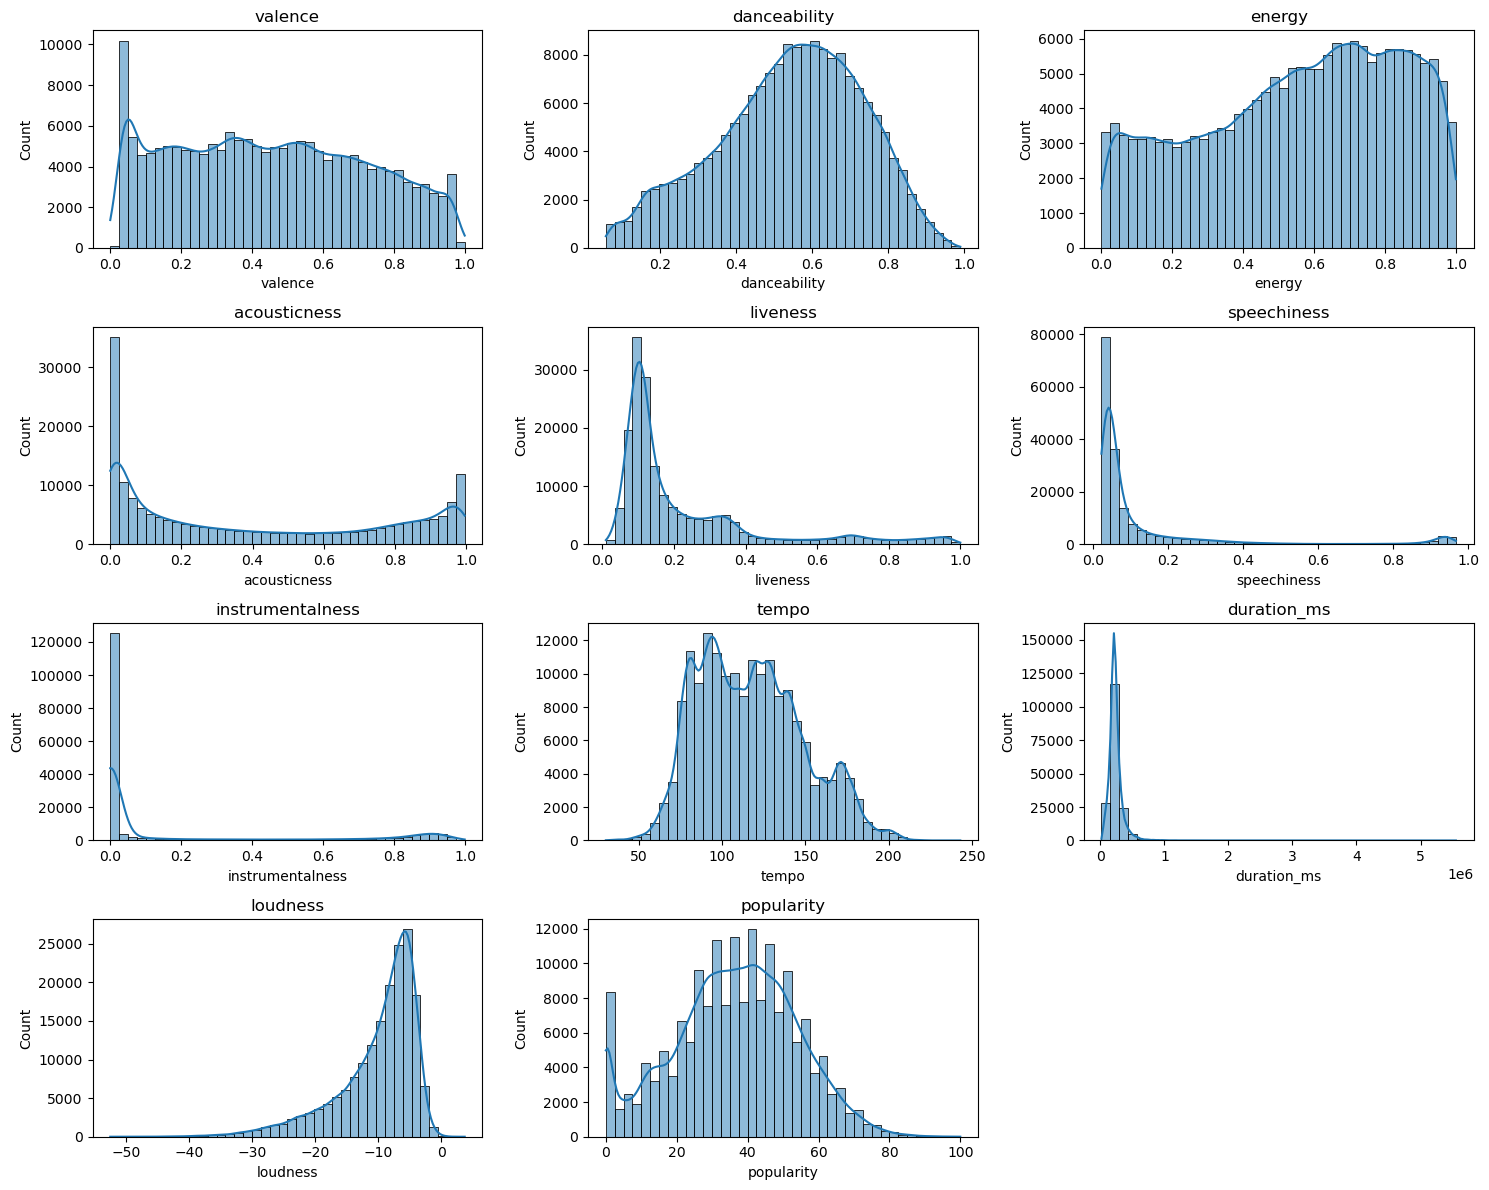

In [17]:
# create an histogram grid for key numeric features from above

numeric_features = [
    "valence", "danceability", "energy", "acousticness",
    "liveness", "speechiness", "instrumentalness",
    "tempo", "duration_ms", "loudness", "popularity"
]

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(col)
plt.tight_layout()
plt.show()


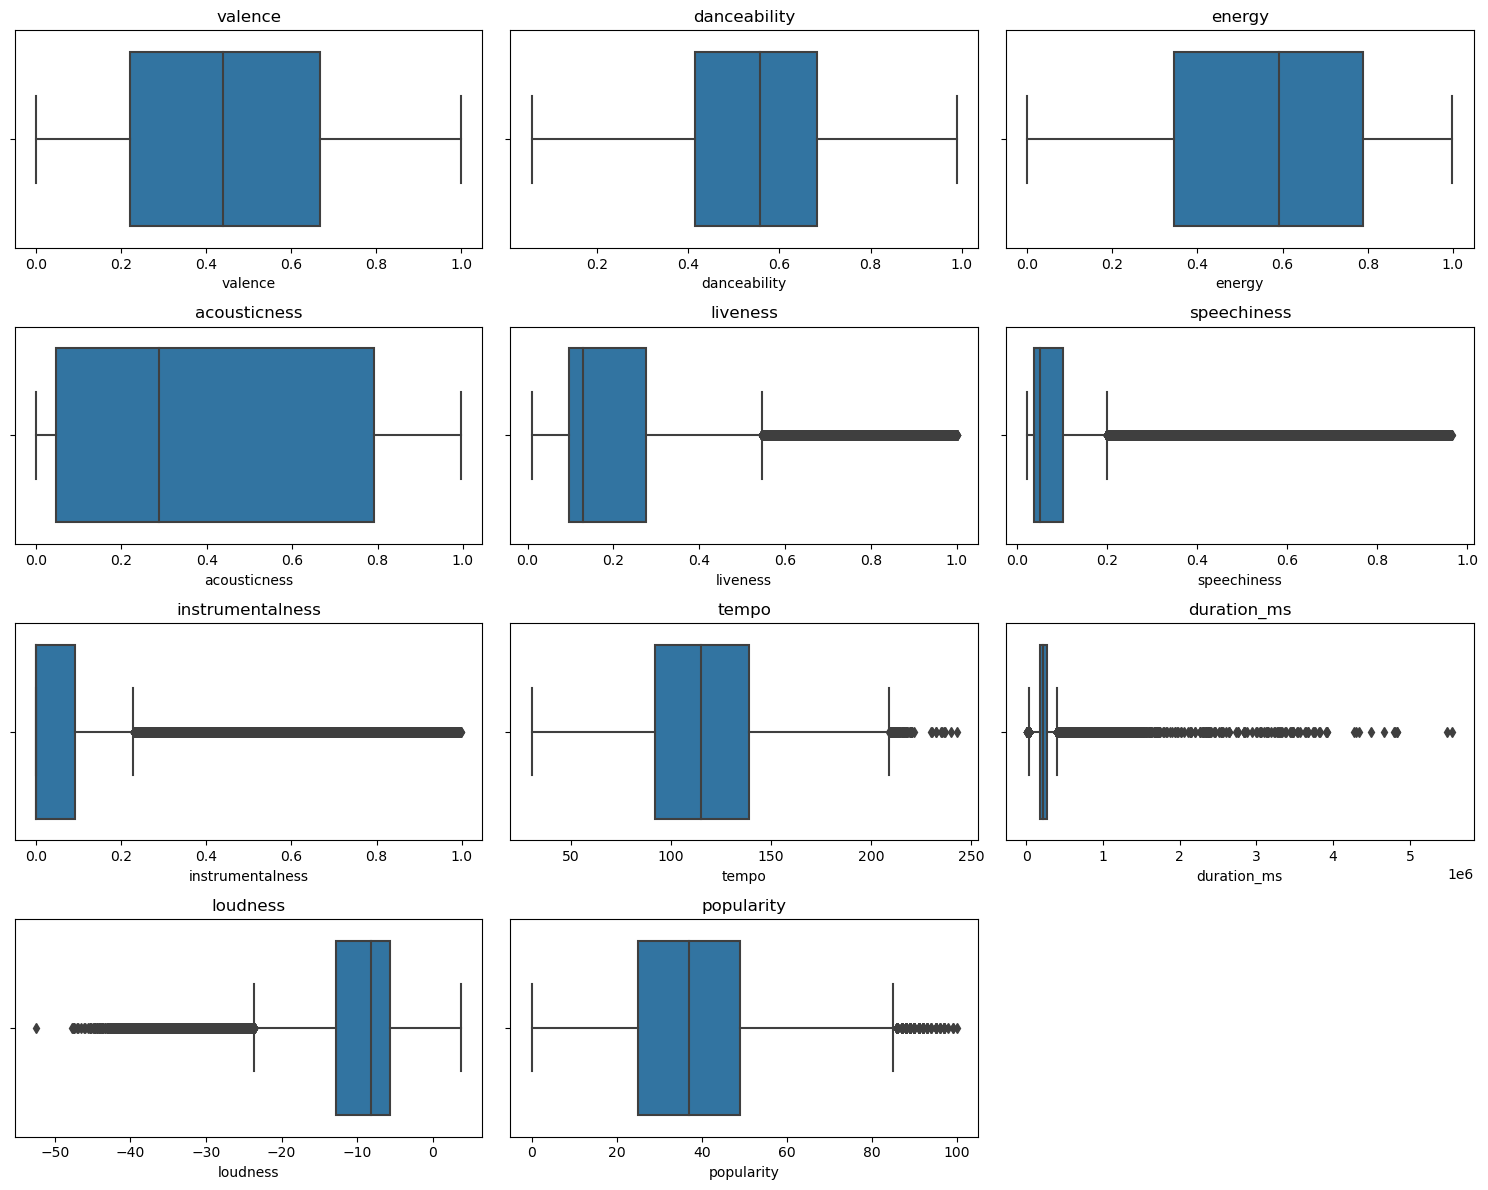

In [18]:
# boxplots

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


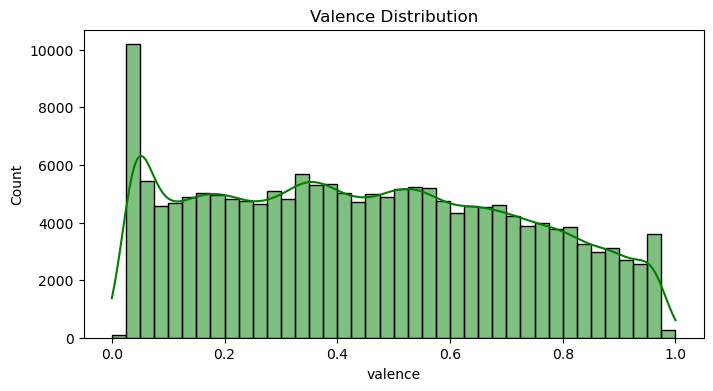

In [19]:
# find valence center/correlations

plt.figure(figsize=(8,4))
sns.histplot(df["valence"], kde=True, bins=40, color="green")
plt.title("Valence Distribution")
plt.show()


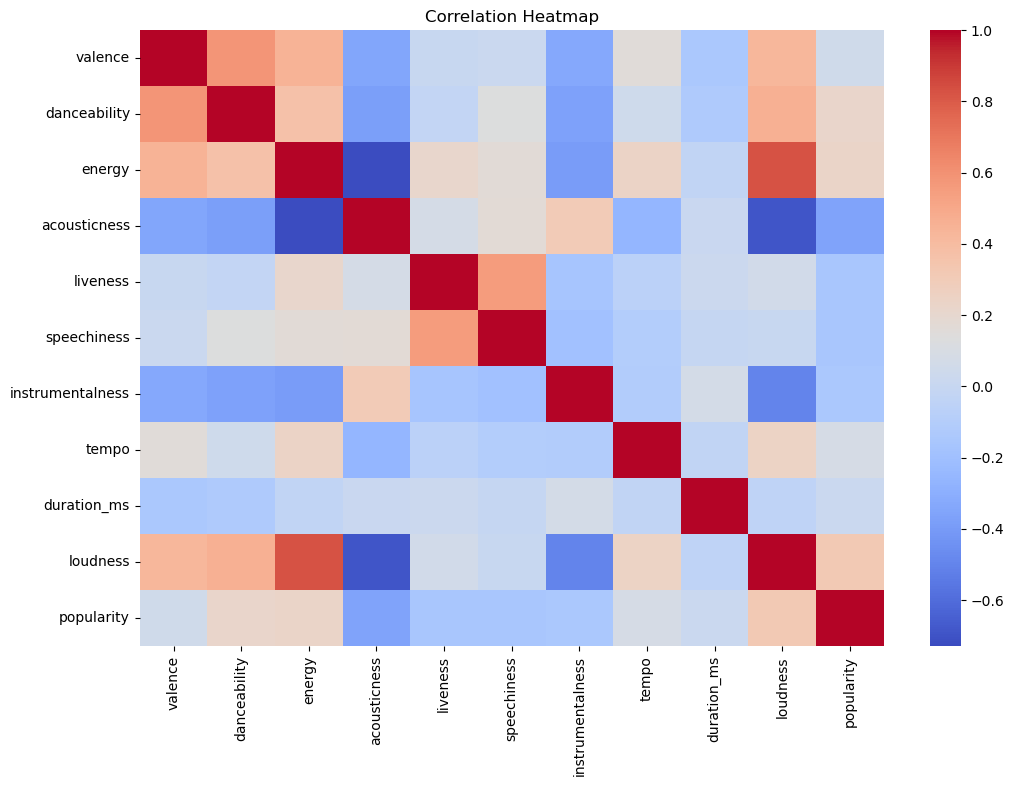

In [20]:
# correlation heatmap for numeric features

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [21]:
# creating scatterplots to get better understanding w each key feature

def valence_scatter(x):
    plt.figure(figsize=(6,4))
    sns.regplot(data=df, x=x, y="valence", scatter_kws={"alpha":0.2}, line_kws={"color":"red"})
    plt.title(f"Valence vs {x}")
    plt.show()

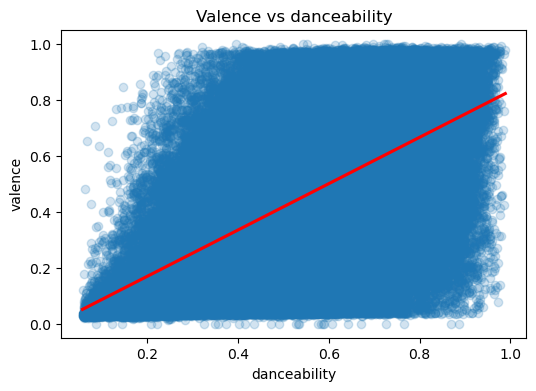

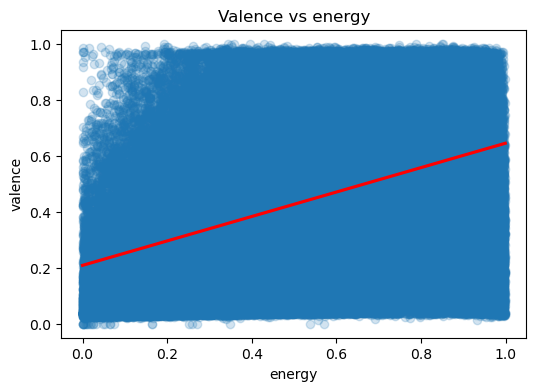

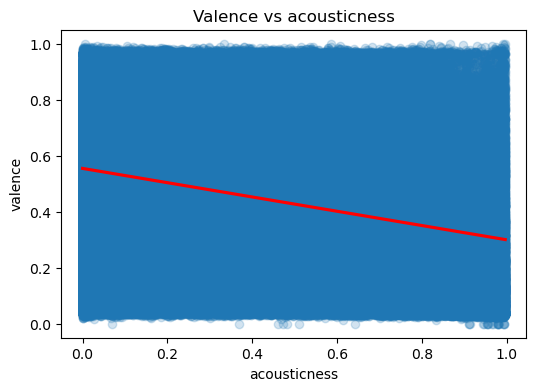

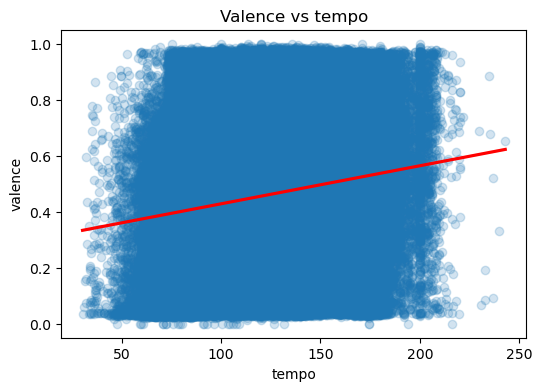

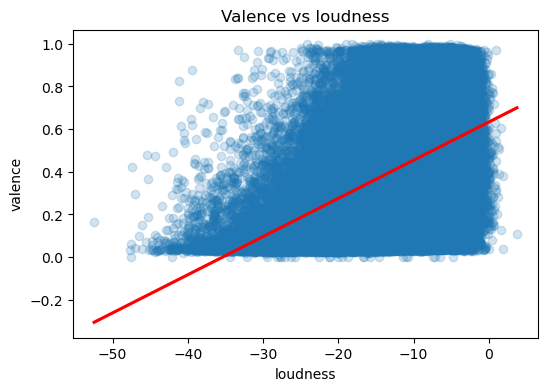

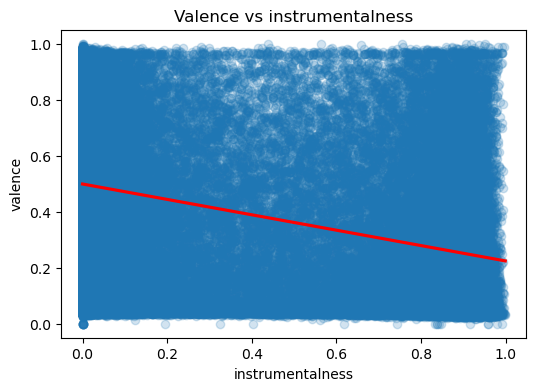

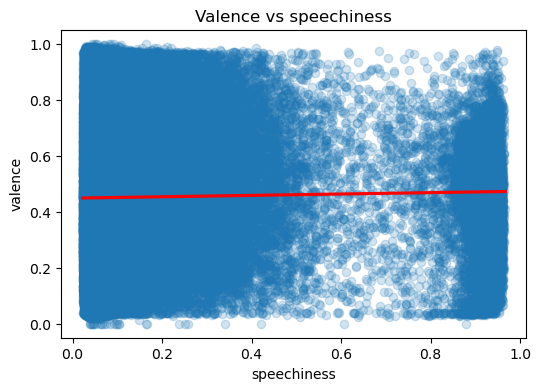

In [22]:
features = [
    "danceability", "energy", "acousticness", 
    "tempo", "loudness", "instrumentalness", "speechiness"
]

for f in features:
    valence_scatter(f)


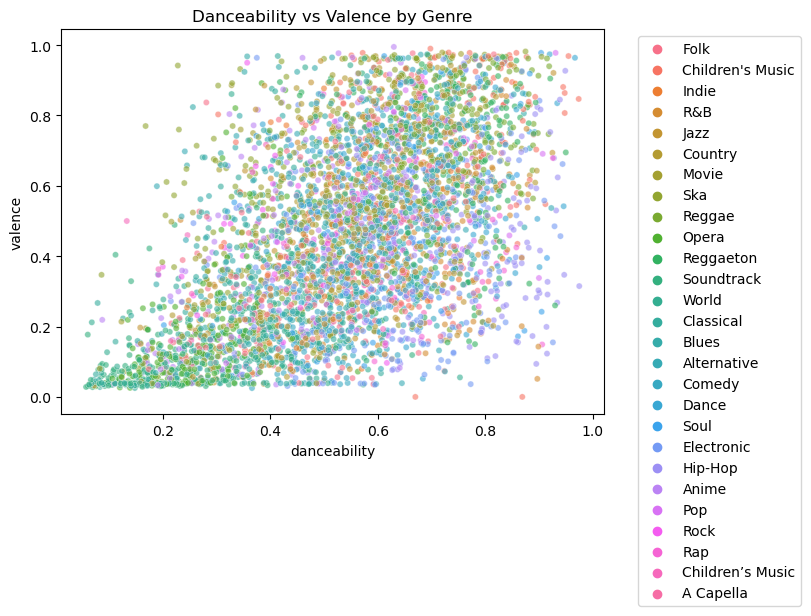

In [23]:
# organizing scatterplots based on colors

plt.figure(figsize=(7,5))
sns.scatterplot(data=df.sample(5000, random_state=1), 
                x="danceability", y="valence", hue="genre", s=20, alpha=0.6)
plt.title("Danceability vs Valence by Genre")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [24]:
# correlation summary
df[["valence"] + features].corr().loc["valence"].sort_values(ascending=False)


valence             1.000000
danceability        0.587775
energy              0.449535
loudness            0.427036
tempo               0.159027
speechiness         0.018707
instrumentalness   -0.331535
acousticness       -0.348968
Name: valence, dtype: float64

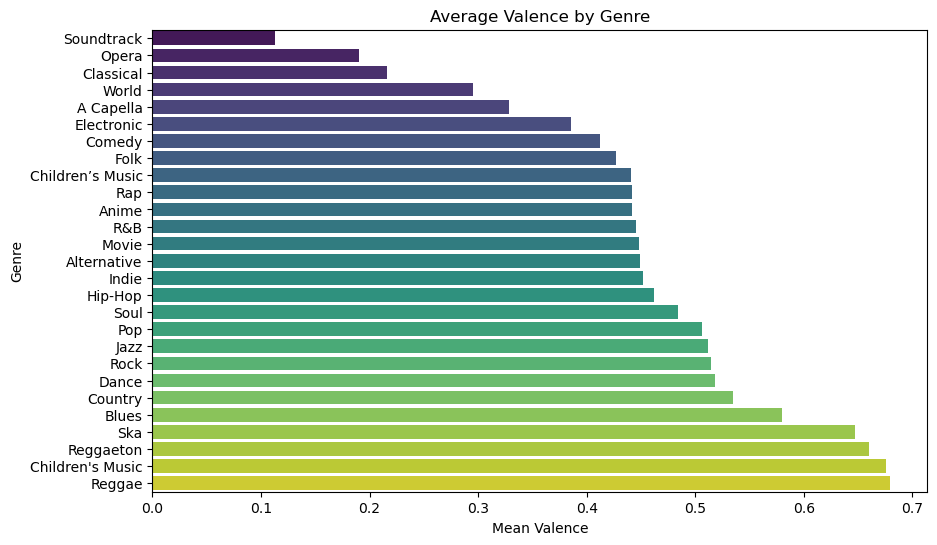

In [25]:
# genre level analysis - avg per genre

genre_valence = df.groupby("genre")["valence"].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=genre_valence.values, y=genre_valence.index, palette="viridis")
plt.title("Average Valence by Genre")
plt.xlabel("Mean Valence")
plt.ylabel("Genre")
plt.show()


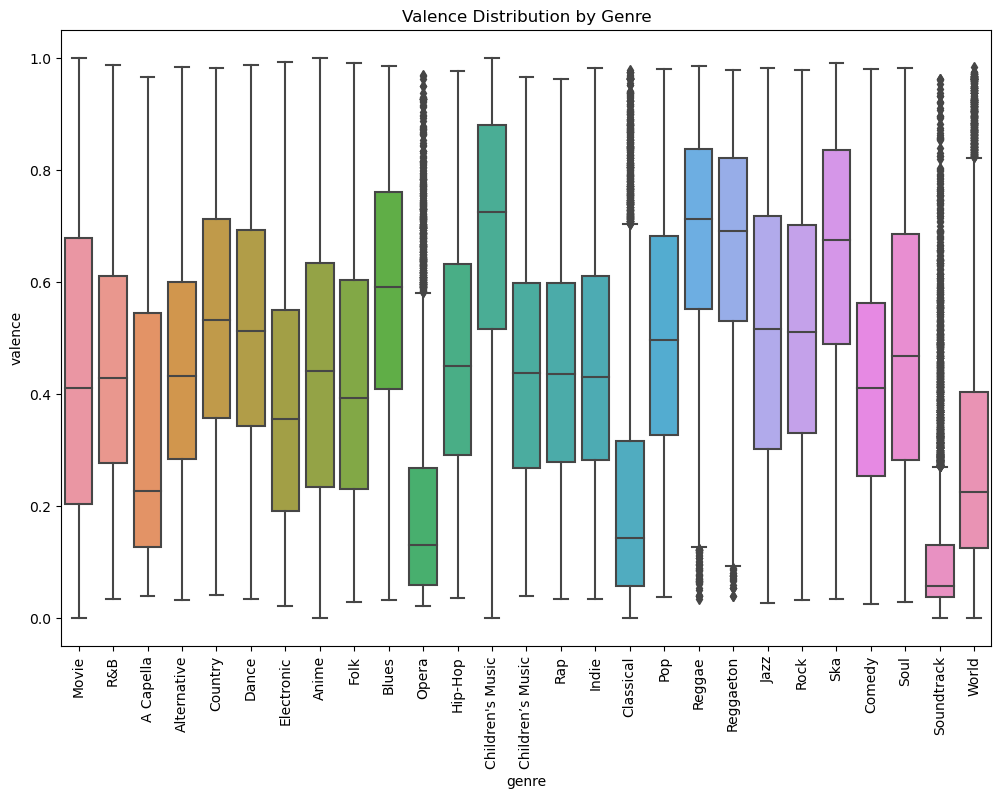

In [26]:
# boxplots

plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="genre", y="valence")
plt.xticks(rotation=90)
plt.title("Valence Distribution by Genre")
plt.show()


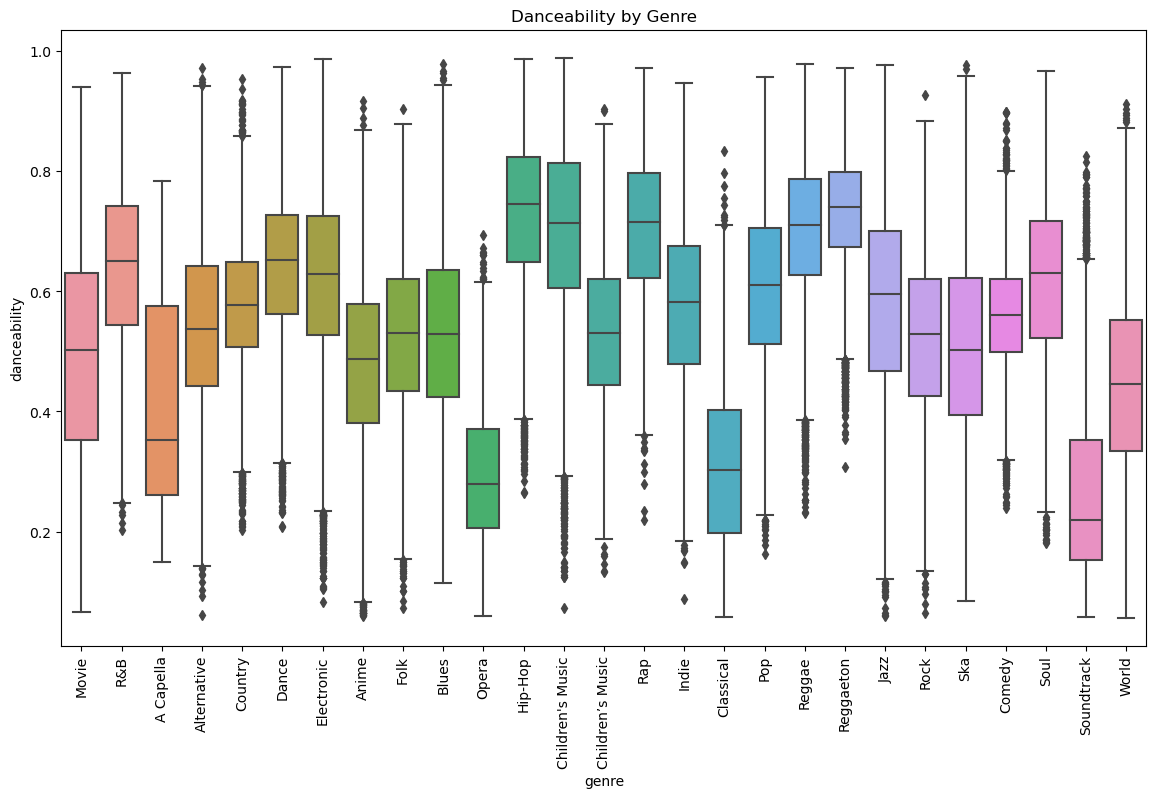

In [27]:
# comparision w danceability

plt.figure(figsize=(14,8))
sns.boxplot(data=df, x="genre", y="danceability")
plt.xticks(rotation=90)
plt.title("Danceability by Genre")
plt.show()


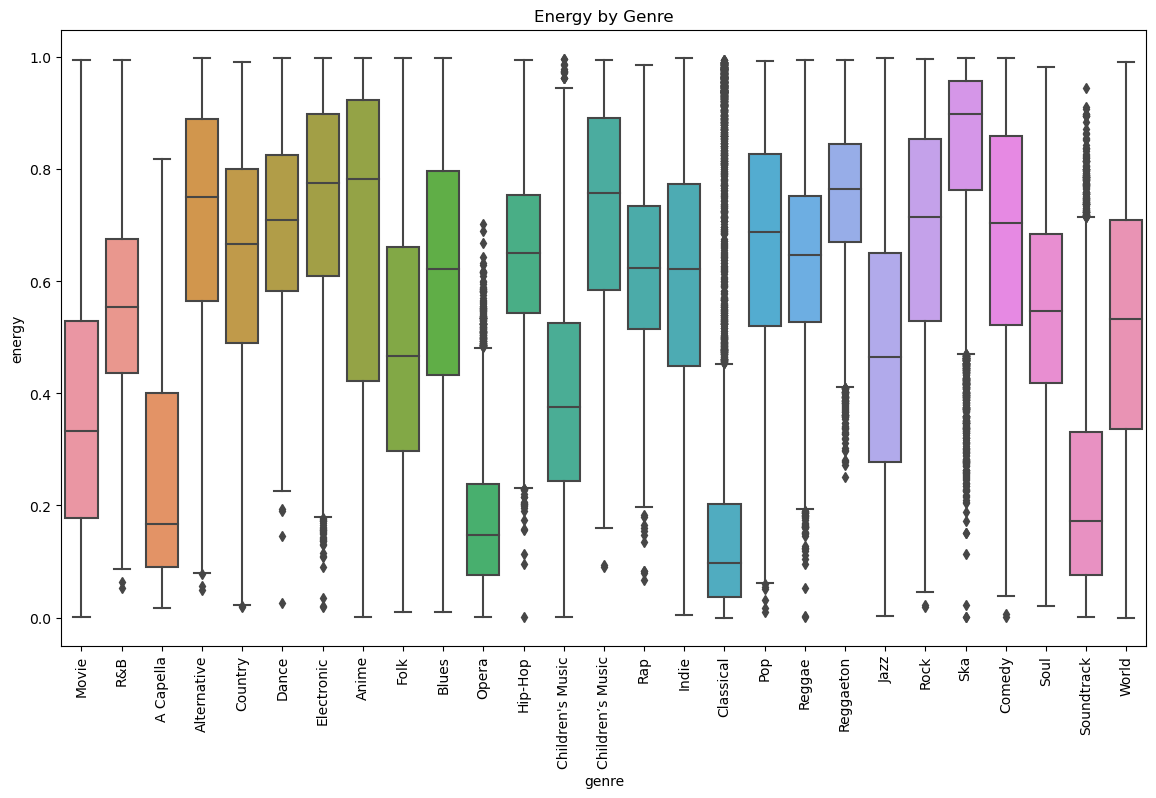

In [28]:
# valence vs energy boxplot

plt.figure(figsize=(14,8))
sns.boxplot(data=df, x="genre", y="energy")
plt.xticks(rotation=90)
plt.title("Energy by Genre")
plt.show()

In [29]:
# correlation summary

genre_summary = df.groupby("genre")[["valence","danceability","energy","acousticness"]].mean()
genre_summary

,valence,danceability,energy,acousticness
genre,,,,
A Capella,0.328724,0.412252,0.250313,0.829941
Alternative,0.448912,0.541139,0.713891,0.160088
Anime,0.441682,0.472091,0.665320,0.286874
Blues,0.580133,0.529086,0.603097,0.333101
Children's Music,0.676019,0.697491,0.396849,0.591723
Children’s Music,0.440666,0.524505,0.719764,0.147291
Classical,0.215660,0.306646,0.175302,0.868529
Comedy,0.412648,0.559011,0.676169,0.793449
Country,0.534842,0.575819,0.635344,0.272280


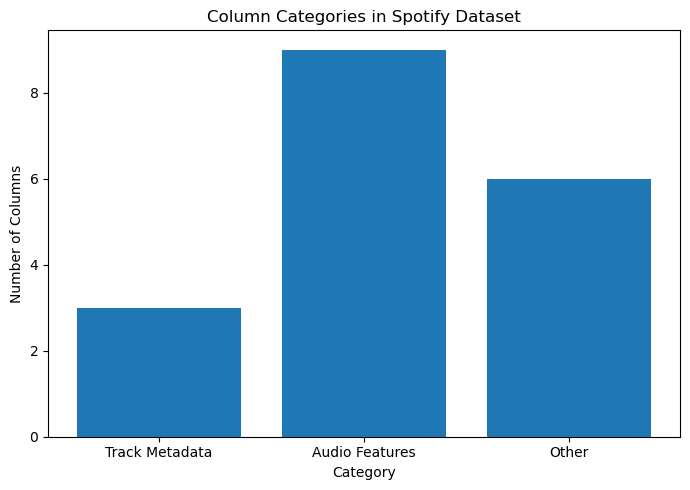

In [31]:
#graph for presentation
metadata_cols = ["track_name", "artist_name", "genre"]
audio_cols = [
    "valence", "danceability", "energy", "acousticness",
    "instrumentalness", "speechiness", "loudness",
    "tempo", "duration_ms"
]

# Everything else is "other"
other_cols = [c for c in df.columns if c not in metadata_cols + audio_cols]

# Count columns
categories = ["Track Metadata", "Audio Features", "Other"]
counts = [len(metadata_cols), len(audio_cols), len(other_cols)]

# Plot bar chart
plt.figure(figsize=(7,5))
plt.bar(categories, counts)
plt.title("Column Categories in Spotify Dataset")
plt.xlabel("Category")
plt.ylabel("Number of Columns")
plt.tight_layout()
plt.show()


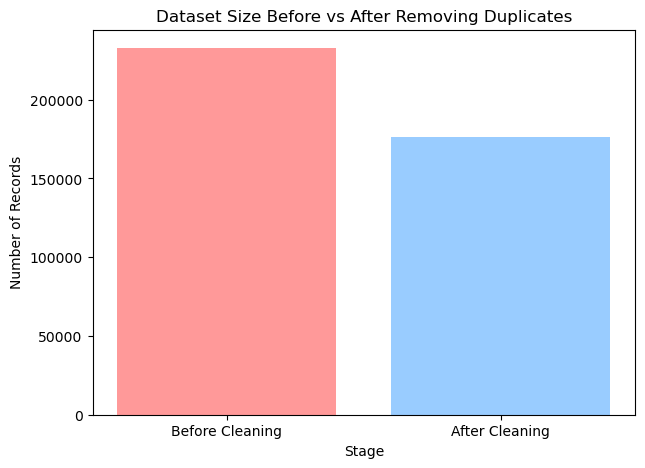

In [6]:
before = len(df_raw)
after = len(df)

plt.figure(figsize=(7, 5))
plt.bar(["Before Cleaning", "After Cleaning"], [before, after], color=["#ff9999", "#99ccff"])
plt.title("Dataset Size Before vs After Removing Duplicates")
plt.ylabel("Number of Records")
plt.xlabel("Stage")
plt.show()


In [8]:
from scipy.stats import pearsonr
import statsmodels.api as sm

In [9]:
def compute_ols_slope(x, y):
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    slope = model.params[1]
    return slope, model.rsquared

slope_energy, r2_energy = compute_ols_slope(df["energy"], df["valence"])
slope_dance, r2_dance = compute_ols_slope(df["danceability"], df["valence"])

# Pearson r
r_energy, _ = pearsonr(df["energy"], df["valence"])
r_dance, _ = pearsonr(df["danceability"], df["valence"])


In [11]:
print("INSIGHT 1: Global Relationships ")
print(f"Energy → Valence: OLS slope = {slope_energy:.4f}, Pearson r = {r_energy:.4f}")
print(f"Danceability → Valence: OLS slope = {slope_dance:.4f}, Pearson r = {r_dance:.4f}\n")

INSIGHT 1: Global Relationships 
Energy → Valence: OLS slope = 0.4365, Pearson r = 0.4495
Danceability → Valence: OLS slope = 0.8267, Pearson r = 0.5878



In [12]:
genres_to_compare = ["Pop", "Jazz", "Hip-Hop"]

features = [
    "danceability", "energy", "valence", "acousticness",
    "instrumentalness", "speechiness", "loudness"
]

print("INSIGHT 2: Genre Fingerprints")
genre_stats = {}

for g in genres_to_compare:
    gdf = df[df["genre"] == g]
    genre_stats[g] = {f: gdf[f].mean() for f in features}
    print(f"\nGenre: {g}")
    for f in features:
        print(f"  {f}: {genre_stats[g][f]:.4f}")

INSIGHT 2: Genre Fingerprints

Genre: Pop
  danceability: 0.6048
  energy: 0.6602
  valence: 0.5060
  acousticness: 0.2541
  instrumentalness: 0.0171
  speechiness: 0.0745
  loudness: -6.1791

Genre: Jazz
  danceability: 0.5804
  energy: 0.4659
  valence: 0.5116
  acousticness: 0.5152
  instrumentalness: 0.3770
  speechiness: 0.0717
  loudness: -11.4428

Genre: Hip-Hop
  danceability: 0.7277
  energy: 0.6454
  valence: 0.4623
  acousticness: 0.1734
  instrumentalness: 0.0091
  speechiness: 0.2113
  loudness: -6.7951


In [13]:
def safe_corr(subset, col1, col2):
    if len(subset) < 3:
        return np.nan
    return pearsonr(subset[col1], subset[col2])[0]

pop_df = df[df["genre"] == "Pop"]
classical_df = df[df["genre"] == "Classical"]

print("\nINSIGHT 3: Popularity Patterns")

correlations = {
    "Pop": {
        "tempo": safe_corr(pop_df, "popularity", "tempo"),
        "loudness": safe_corr(pop_df, "popularity", "loudness")
    },
    "Classical": {
        "tempo": safe_corr(classical_df, "popularity", "tempo"),
        "loudness": safe_corr(classical_df, "popularity", "loudness")
    }
}

for genre, corr_vals in correlations.items():
    print(f"\n{genre}:")
    print(f"  popularity vs tempo:  r = {corr_vals['tempo']:.4f}")
    print(f"  popularity vs loudness: r = {corr_vals['loudness']:.4f}")


INSIGHT 3: Popularity Patterns

Pop:
  popularity vs tempo:  r = -0.0416
  popularity vs loudness: r = -0.0081

Classical:
  popularity vs tempo:  r = -0.0046
  popularity vs loudness: r = 0.0598


In [14]:
import plotly.express as px

In [ ]:
# loudness before and after cleaning

df["loudness_scaled"] = (df["loudness"] + 60) / 60

fig = px.histogram(
    df,
    x=["loudness", "loudness_scaled"],
    nbins=40,
    barmode="overlay",
    opacity=0.6,
    title="Loudness: Raw Scale vs Scaled (0–1)"
)

fig.update_layout(
    legend_title="Version",
    height=450
)
fig.show()
